In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [135]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# **Data Cleaning Exercise**

For this assignment the main objective is to use data cleaning and preprocessing and visualization on a given exercise in order to improve the performance of the data for training and testing. For this assignment I will be using a Video Game Dataset from Kaggle which lists Video Game Sales globally between the years 1980 and 2020. Link to the dataset can be found here: https://www.kaggle.com/gregorut/videogamesales

In [110]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/vgsales.csv')
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


First I want to check the shape of the dataset to see if I would like to do dimensionality reduction to reduce the variables in order to improve performance. I also use df.info() and df.describe() to get other generic information about the dataset values.

In [111]:
df.shape

(16598, 11)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [113]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


We can use the heatmap to see if there is any correlations between the variables.

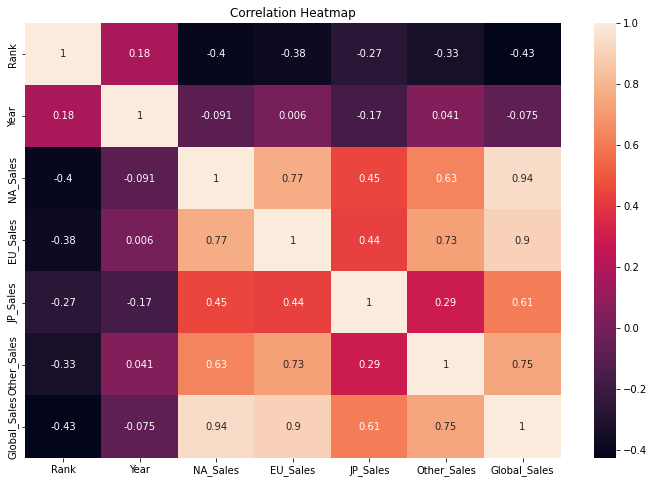

In [150]:
plt.rcParams["figure.figsize"] = (12, 8)
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

I then check to see if there are null/NaN values that need to be addressed, and when I use the isnull() function, I found that indeed there were null values in Year and Publisher columns. I decided that the best way to remove these null values were to remove the rows (games) that did not have a publisher or year value recorded.

In [114]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [115]:
df1 = df.dropna(subset=["Year"])
df2 = df1.dropna(subset=["Publisher"])
df2.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Now there are no more null values

In [116]:
df2.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# **Dimensionality Reduction**

I then want to see the game publishing companies that make the most global sales, and to do that I run the df.Publisher.unique() command to find that there are a lot of companies that created games during this period.

In [117]:
print(df.Publisher.unique())

['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' nan 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Activision Value' 'Banpresto'
 'D3Publisher' 'Oxygen Interactive' 'Red Storm Entertainmen

When I group by the publishers, I can see that there are 576 total game companies, which is a lot of companies that have created games. However, when we graph out the global sales by publisher, we can see that there is a large drop off since only a few companies have much higher sales than the rest.

In [118]:
group_by_publisher = df2.groupby('Publisher')['Global_Sales'].sum().reset_index()
group_by_publisher.sort_values('Global_Sales', ascending=False, inplace = True)
print(group_by_publisher)

                       Publisher  Global_Sales
359                     Nintendo       1784.43
138              Electronic Arts       1093.39
21                    Activision        721.41
455  Sony Computer Entertainment        607.28
524                      Ubisoft        473.54
..                           ...           ...
147                   Epic Games          0.01
389          Paradox Development          0.01
421                   Rain Games          0.01
45         Ascaron Entertainment          0.01
96                      Commseed          0.01

[576 rows x 2 columns]


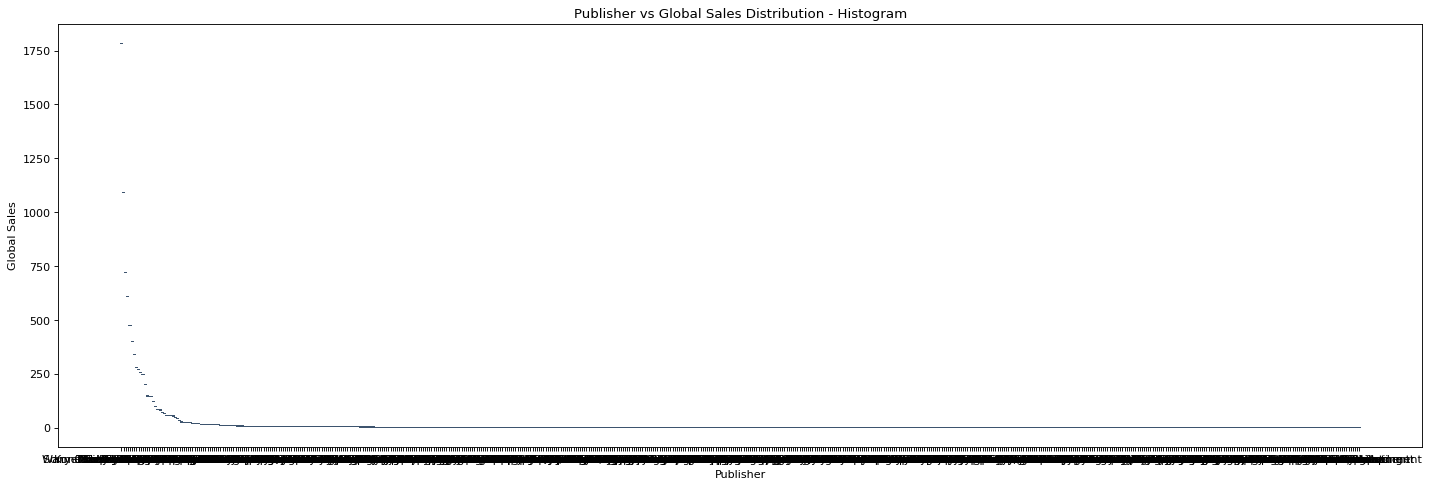

In [141]:
figure(figsize=(22, 7), dpi=80)

plot = sns.histplot(data = group_by_publisher, x = 'Publisher', y = "Global_Sales")
plt.title("Publisher vs Global Sales Distribution - Histogram")
plt.xlabel('Publisher')
plt.ylabel('Global Sales')

plt.show()

To fix this problem, I set the limit to 50, so only companies with sales above 50 would be listed in the dataset.

In [119]:
group_by_publisher_red = group_by_publisher[group_by_publisher["Global_Sales"] >= 50]
print(group_by_publisher_red)

                                  Publisher  Global_Sales
359                                Nintendo       1784.43
138                         Electronic Arts       1093.39
21                               Activision        721.41
455             Sony Computer Entertainment        607.28
524                                 Ubisoft        473.54
493                    Take-Two Interactive        399.30
487                                     THQ        340.44
275            Konami Digital Entertainment        278.56
445                                    Sega        270.70
347                      Namco Bandai Games        253.65
323                  Microsoft Game Studios        245.79
85                                   Capcom        199.95
53                                    Atari        146.77
464                             Square Enix        144.73
547  Warner Bros. Interactive Entertainment        142.34
126              Disney Interactive Studios        118.76
137           

Now the data is much more balanced.

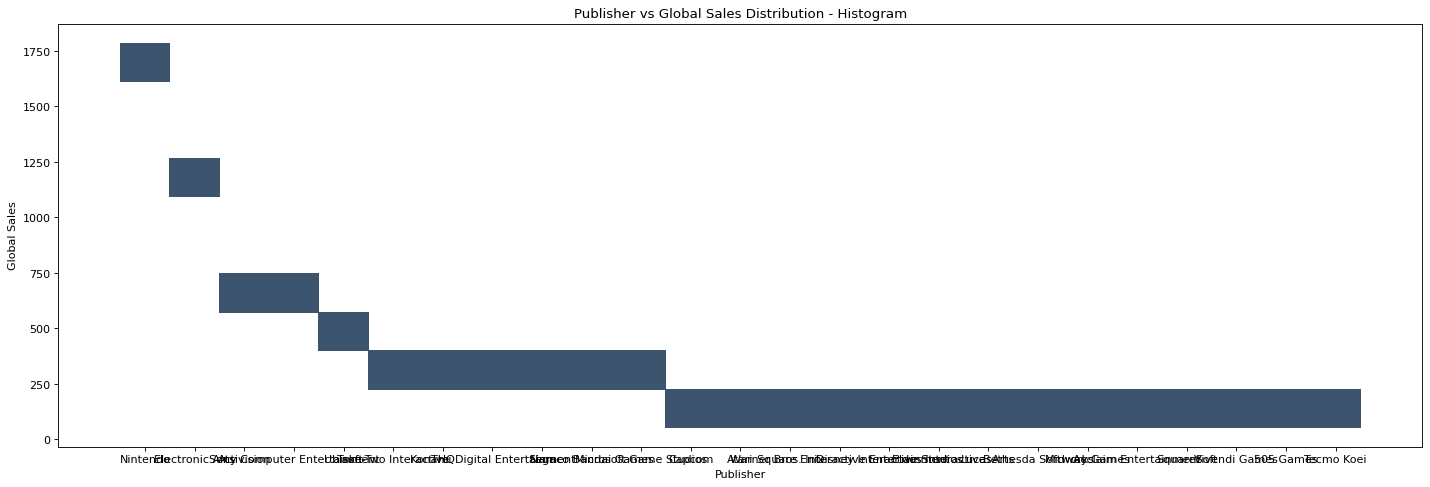

In [142]:
figure(figsize=(22, 7), dpi=80)

plot = sns.histplot(data = group_by_publisher_red, x = 'Publisher', y = "Global_Sales")
plt.title("Publisher vs Global Sales Distribution - Histogram")
plt.xlabel('Publisher')
plt.ylabel('Global Sales')

plt.show()

In [143]:
publishers = group_by_publisher_red.Publisher.to_numpy()
df3 = df2.loc[df2.apply(lambda x: x.Publisher in publishers, axis=1)]
df3

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16569,16572,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16575,16578,Neo Angelique Special,PSP,2008.0,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16584,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.00,0.01


When we check the publisher column in the new table only the games published by publishers with total global sales > 50 will be listed in the dataframe.

In [144]:
df3.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'Konami Digital Entertainment',
       'Square Enix', 'LucasArts',
       'Warner Bros. Interactive Entertainment', 'Eidos Interactive',
       'Vivendi Games', 'Namco Bandai Games', 'THQ',
       'Acclaim Entertainment', 'Disney Interactive Studios',
       'Midway Games', 'Tecmo Koei'], dtype=object)

We can check again to see that there are no null values in the dataset.

In [145]:
df3.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64